In [1]:
import numpy as np
import torch
from tqdm import tqdm
import os
import pandas as pd
from torch_geometric.data import Data

### Explore Data

In [2]:
df = pd.read_csv('AirPollutionSeoul/Measurement_summary.csv')

In [3]:
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


In [5]:
df_info = pd.read_csv('AirPollutionSeoul/Original Data/Measurement_info.csv')

* Measurement_info

In [6]:
df_info.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2017-01-01 00:00,101,1,0.004,0
1,2017-01-01 00:00,101,3,0.059,0
2,2017-01-01 00:00,101,5,1.200,0
3,2017-01-01 00:00,101,6,0.002,0
4,2017-01-01 00:00,101,8,73.000,0


* Measurement_item_info

In [7]:
df_item_info = pd.read_csv('AirPollutionSeoul/Original Data/Measurement_item_info.csv')

In [8]:
df_item_info.head()

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0


* Measurement_station_info

In [9]:
station = pd.read_csv('AirPollutionSeoul/Original Data/Measurement_station_info.csv')

In [10]:
station.head()

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


* Visualization

In [11]:
import matplotlib.pyplot as plt

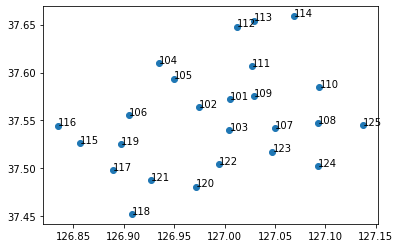

In [12]:
y = station.loc[:, 'Latitude']
x = station.loc[:, 'Longitude']
n = station.loc[:, 'Station code']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
plt.savefig('station_code.png')

In [13]:
station101 = df[df['Station code'] == 101]
station101['Measurement date'] = pd.to_datetime(station101['Measurement date'], format='%Y-%m-%d %H:%M')

C:\Users\ideapad 330\.conda\envs\AIML\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Measurement date'>

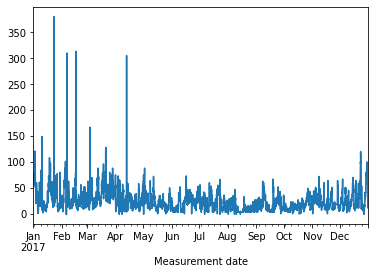

In [14]:
station101.set_index(['Measurement date'], inplace=True)
station101.iloc[0 : 24 * 365]['PM2.5'].plot()

* Prepare Data

In [15]:
station = dict()
for i in [101, 116, 118, 125, 114]:
    station[f'{i}'] = df[df['Station code'] == i].iloc[0 : 24 * 365]

In [16]:
df.iloc[0, 10]

57.0

In [17]:
L = []
for i in range(365*24 ):
    A = []
    for code in [101, 116, 118, 125, 114]:
        data = station[f'{code}']
        A.append(data.iloc[i, 10].tolist())
    L.append(A)

In [18]:
stacked_target = np.array(L)

In [19]:
stacked_target.shape

(8760, 5)

In [20]:
lags = 4
features = [stacked_target[i:i+lags,:].T for i in range(stacked_target.shape[0]-lags)]
targets  = [stacked_target[i+lags,:].T for i in range(stacked_target.shape[0]-lags)]

In [21]:
_edges = torch.tensor([[1, 2, 3, 4, 0],
                                   [0, 0, 0, 0, 1]], dtype=torch.long)

_edge_weights = np.ones(_edges.shape[1])

In [22]:
_edge_weights.shape

(5,)

### Model

In [23]:
from torch_geometric_temporal.signal import StaticGraphTemporalSignal
from torch_geometric_temporal.signal import temporal_signal_split

* create datasets

In [24]:
dataset = StaticGraphTemporalSignal(_edges, _edge_weights, features, targets)

In [25]:
train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio=0.2)

* Initial Model

In [26]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import DCRNN

class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features):
        super(RecurrentGCN, self).__init__()
        self.recurrent = DCRNN(node_features, 32, 1)
        self.linear = torch.nn.Linear(32, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent(x, edge_index, edge_weight)
        h = F.relu(h)
        h = self.linear(h)
        return h

* Train

In [27]:
from tqdm import tqdm

model = RecurrentGCN(node_features = 4)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

for epoch in tqdm(range(50)):
    cost = 0
    for time, snapshot in enumerate(train_dataset):
        y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        cost = cost + torch.mean((y_hat-snapshot.y)**2)
    cost = cost / (time+1)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:00<00:00,  6.00s/it]


* Measure MSE

In [28]:
model.eval()
cost = 0
for time, snapshot in enumerate(test_dataset):
    y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))

MSE: 468.3608


* Check Model

In [29]:
k = list(test_dataset)[50]

In [30]:
model(k.x, k.edge_index, k.edge_attr)

tensor([[9.0237],
        [9.0237],
        [9.0237],
        [9.0237],
        [9.0237]], grad_fn=<AddmmBackward>)

In [31]:
k.y

tensor([48., 46., 59., 53., 48.])